In [1]:
# Across-Fjord Properties Gif
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw
import cmocean

In [2]:
# Read variables from dataset
def AF_prof(datapath, case_id, time, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = (state.U.data[:, :, :, 1:] + state.U.data[:, :, :, :-1]) / 2
    Uzy = u0[time,:,:,xidx]
    
    # Potential temp
    Tzy = state.Temp.data[time,:,:,xidx] # Temp in z, t dimensions
    
    depth = state.Z.data
    dist = state.Y.data - 25500         
    
    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Szy = state.S.data[time,:,:,xidx]
    p = np.tile(pres,[len(dist),1]).T
    RhoA = gsw.rho(Szy, Tzy, p) - 1000
               
    return depth, dist, Uzy, RhoA, Tzy, Szy

In [ ]:
# Run some tests
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/1_BaseCase'
path4 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_maxhs'
path5 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_nosill'
#depth, dist, U1, Rho1 = AF_prof(path3, 1, -1, 178)
#state = xr.open_dataset(path3 + '/state_' + str(format(6,'03d')) + '.nc') 
#U = state.U.data
#V = state.V.data

In [ ]:
#U1.shape, Rho1.shape
U.max(), U.min(), V.max(), V.min()

In [ ]:
# Making plot
caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/1Sz_maxhs/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.2,0.2,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
#crho1 = np.linspace(10,15,20) # Contour range for density
crho1 = np.linspace(15,20,20) # Contour range for density
crho2 = np.linspace(15,20,10)
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal

for t in range(2,121,2):
    fig1 = plt.figure(figsize=(8,8))
    fig1.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path4, caseN, t, sc)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path4, caseN, t, sw)
    
    # Plot along-fjord velocity
    ax1 = fig1.add_subplot(221)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='both')
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    #CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    CS1 = ax1.contour(dist, depth[:22], Rho1[:22,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig1.add_axes([0.95, 0.53, 0.02, 0.34])
    cbar1 = fig1.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.2,0,0.2])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    #ax1.set_ylim(depth[8],depth[0])
    ax1.set_ylim(depth[22],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) Sc', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig1.add_subplot(222)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1, extend='both')
    #ax2.axhline(y=depth[8],color='k',linestyle='--')
    ax2.axhline(y=depth[22],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho2, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig1.add_subplot(223)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    CS3 = ax3.contour(dist, depth[:22], Rho1[:22,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig1.add_axes([0.95, 0.12, 0.02, 0.34])
    cbar2 = fig1.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    #ax3.set_ylim(depth[8],depth[0])
    ax3.set_ylim(depth[22],depth[0])
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig1.add_subplot(224)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    #ax4.axhline(y=depth[8],color='k',linestyle='--')
    ax4.axhline(y=depth[22],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho2, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S1', loc='left', size=15, weight='bold')
    ax4.set_xlabel('Across-fjord distance [$m$]', size=15)

    plt.close()
    day = int(t / 2)
    fig1.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig1.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')

In [ ]:
depth[21]

In [ ]:
#np.arange(10,121,10)
for m in range(10,121,10):
    print(m, end='\n ')

In [ ]:
# Making plot
caseN = 1
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/InsideFjord/AboveSill/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho = np.linspace(13,15,5)
cs = np.linspace(15,25,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(2,121,2):
    fig2 = plt.figure(figsize=(8,12))
    fig2.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path2, caseN, t, gf)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path2, caseN, t, sw)
    
    # Plot along-fjord velocity
    ax1 = fig2.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1)
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig2.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig2.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[8],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig2.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    #ax2.axhline(y=depth[8],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[8],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig2.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig2.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig2.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[8],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) S0', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig2.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    #ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[8],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S1', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig2.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    #ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig2.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig2.colorbar(im5,cax=cbaxes3, orientation='vertical')
    #cbar3.set_ticks([15, 25, 35])
    cbar3.set_ticks([15, 20, 25])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[8],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) S0', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig2.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    #ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[8],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S1', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig2.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig2.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho1 = np.linspace(13,15,5)
crho2 = np.linspace(15,25,5)
cs = np.linspace(15,35,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(2,121,2):
    fig3 = plt.figure(figsize=(8,12))
    fig3.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path2, caseN, t, sc)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path2, caseN, t, se)
    
    # Plot along-fjord velocity
    ax1 = fig3.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='max')
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig3.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig3.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[8],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) Sc', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig3.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    ax2.axhline(y=depth[8],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S2', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig3.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig3.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig3.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[8],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig3.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig3.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    #ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig3.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig3.colorbar(im5,cax=cbaxes3, orientation='vertical')
    cbar3.set_ticks([15, 25, 35])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[8],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) Sc', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig3.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[-1],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S2', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig3.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig3.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


In [ ]:
# Making plot for 1Sz case
caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/InsideFjord/1Sz/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho = np.linspace(15,25,10)
cs = np.linspace(20,30,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(20,21):
    fig4 = plt.figure(figsize=(8,12))
    fig4.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path4, caseN, t, gf)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path4, caseN, t, sw)
    
    # Plot along-fjord velocity
    ax1 = fig4.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='max')
    ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig4.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig4.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[-1],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig4.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    ax2.axhline(y=-48,color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig4.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig4.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig4.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[-1],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) S0', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig4.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    #ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S1', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig4.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig4.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig4.colorbar(im5,cax=cbaxes3, orientation='vertical')
    cbar3.set_ticks([20, 25, 30])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[-1],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) S0', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig4.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[-1],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S1', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig4.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    #plt.close()
    #fig4.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


In [ ]:
depth[20:23]

In [ ]:
caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/1Sz/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho1 = np.linspace(16,18,6)
crho2 = np.linspace(15,25,10)
cs = np.linspace(20,30,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(2,121,2):
    fig5 = plt.figure(figsize=(8,12))
    fig5.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path2, caseN, t, sc)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path2, caseN, t, se)
    
    # Plot along-fjord velocity
    ax1 = fig5.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='max')
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig5.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig5.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[8],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) Sc', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig5.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    ax2.axhline(y=depth[8],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S2', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig5.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig5.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig5.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[8],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig5.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig5.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    #ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig5.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig5.colorbar(im5,cax=cbaxes3, orientation='vertical')
    cbar3.set_ticks([20, 25, 30])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[8],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) Sc', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig5.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[-1],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S2', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig5.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig5.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


In [ ]:
# Making plot for two glacier front sections comparison
caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/gf_comp/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.2,0.2,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
#crho1 = np.linspace(10,15,20) # Contour range for density
crho1 = np.linspace(15,25,10) # Contour range for density
#crho2 = np.linspace(15,20,10)
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal

for t in range(120, 121):
    fig6 = plt.figure(figsize=(8,8))
    fig6.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path2, caseN, t, gf) # Linear N2 minhs
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path5, caseN, t, gf) # Linear N2 no-sill
    
    # Plot along-fjord velocity
    ax1 = fig6.add_subplot(221)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='both')
    ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    #CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    CS1 = ax1.contour(dist, depth, Rho1, crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig6.add_axes([0.95, 0.53, 0.02, 0.34])
    cbar1 = fig6.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.2,0,0.2])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    #ax1.set_ylim(depth[8],depth[0])
    ax1.set_ylim(depth[-1],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) $1N_0^2, h_s/h_f=0.04$', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig6.add_subplot(222)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1, extend='both')
    #ax2.axhline(y=depth[8],color='k',linestyle='--')
    #ax2.axhline(y=depth[22],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho1, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) $1N_0^2, h_s/h_f=1$', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig6.add_subplot(223)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    ax4.axhline(y=depth[8],color='k',linestyle='--')
    #CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    CS3 = ax3.contour(dist, depth, Rho1, crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig6.add_axes([0.95, 0.12, 0.02, 0.34])
    cbar2 = fig6.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    #ax3.set_ylim(depth[8],depth[0])
    ax3.set_ylim(depth[-1],depth[0])
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) $1N_0^2, h_s/h_f=0.04$', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig6.add_subplot(224)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    #ax4.axhline(y=depth[8],color='k',linestyle='--')
    #ax4.axhline(y=depth[22],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho1, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) $1N_0^2, h_s/h_f=1$', loc='left', size=15, weight='bold')
    ax4.set_xlabel('Across-fjord distance [$m$]', size=15)

    day = int(t / 2)
    fig6.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
#     plt.close()
#     fig6.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')

In [ ]:
# Generate GIF from saved output figures
import imageio
import glob

images = []
imagenames = sorted(glob.glob(fig_path + '/Day*.png'))

for filename in imagenames:
    images.append(imageio.imread(filename))
imageio.mimsave(fig_path + '/GF-AcrossFjord_Comp.gif', images, duration=.2)

In [3]:
## Snapshots for 4 Regimes
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_maxhs'

S0, S1, Sc, S2 = 6, 120, 178, 235
depthS1, dist, U1, Rho1, T1, Sal1 = AF_prof(path1, 5, -1, S1) # Regime 1
depthS1, dist, U2, Rho2, T2, Sal2 = AF_prof(path2, 4, 16, S1) # Regime 2
depthS1, dist, U3, Rho3, T3, Sal3 = AF_prof(path1, 1, 16, S1) # Regime 3
depthS1, dist, U4, Rho4, T4, Sal4 = AF_prof(path1, 1, -1, S1) # Regime 4

depthSc, dist, Us1, Rhos1, Ts1, Sals1 = AF_prof(path1, 5, -1, Sc) # Regime 1
depthSc, dist, Us2, Rhos2, Ts2, Sals2 = AF_prof(path2, 4, 16, Sc) # Regime 2
depthSc, dist, Us3, Rhos3, Ts3, Sals3 = AF_prof(path1, 1, 16, Sc) # Regime 3
depthSc, dist, Us4, Rhos4, Ts4, Sals4 = AF_prof(path1, 1, -1, Sc) # Regime 4

Text(0.5, 0, 'Distance [$km$]')

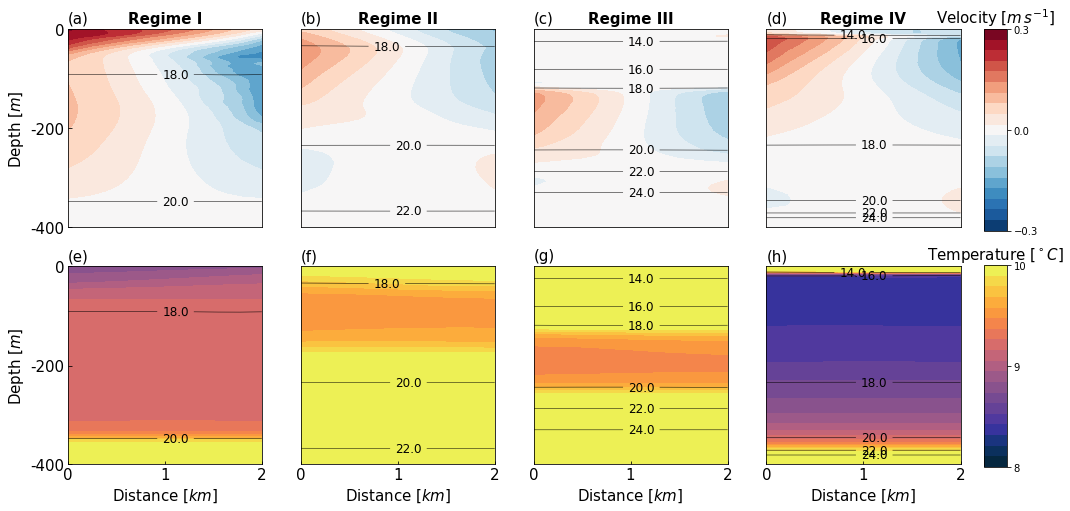

In [8]:
# Making plot for Regimes comparison at Section S1

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/gf_comp/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

dist = dist / 1000
cu = np.linspace(-0.3,0.3,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
#crho1 = np.linspace(14,24,11) # Contour range for density
crho1 = [14, 16, 18, 20, 22, 24] # Contour range for density
#crho2 = np.linspace(15,20,10)
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal


fig7 = plt.figure(figsize=(16,8)) 
fig7.tight_layout()

### Along-fjord velocity
# Plot along-fjord velocity
ax1 = fig7.add_subplot(241) # Regime 1
im1 = ax1.contourf(dist, depthS1, U1, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS1 = ax1.contour(dist, depthS1, Rho1, crho1, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes1 = fig7.add_axes([0.92, 0.53, 0.02, 0.35])
cbar1 = fig7.colorbar(im1,cax=cbaxes1, orientation='vertical')
cbar1.set_ticks([-0.3,0,0.3])
cbar1.ax.set_title('Velocity [$m\,s^{-1}$]', size=15)

ax1.set_xlim(dist[0],dist[-1])
ax1.set_ylim(depthS1[-1],depthS1[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_yticks([depthS1[0], -200, depthS1[-1]])
ax1.set_yticklabels(["0","-200","-400"])
ax1.set_title('(a)', loc='left', size=15)
ax1.set_title('Regime I', loc='center', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig7.add_subplot(242) # Regime 2
im2 = ax2.contourf(dist, depthS1, U2, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS2 = ax2.contour(dist, depthS1, Rho2, crho1, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

ax2.set_xlim(dist[0],dist[-1])
ax2.set_ylim(depthS1[-1],depthS1[0])
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b)', loc='left', size=15)
ax2.set_title('Regime II', loc='center', size=15, weight='bold')



ax3 = fig7.add_subplot(243) # Regime 3
im3 = ax3.contourf(dist, depthS1, U3, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS3 = ax3.contour(dist, depthS1, Rho3, crho1, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

ax3.set_xlim(dist[0],dist[-1])
ax3.set_ylim(depthS1[-1],depthS1[0])
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c)', loc='left', size=15)
ax3.set_title('Regime III', loc='center', size=15, weight='bold')



ax4 = fig7.add_subplot(244) # Regime 4
im4 = ax4.contourf(dist, depthS1, U4, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')
# Isopycnals
CS4 = ax4.contour(dist, depthS1, Rho4, crho1, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

ax4.set_xlim(dist[0],dist[-1])
ax4.set_ylim(depthS1[-1],depthS1[0])
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d)', loc='left', size=15)
ax4.set_title('Regime IV', loc='center', size=15, weight='bold')



### Temperature
ax5 = fig7.add_subplot(245) # Regime 1
im5 = ax5.contourf(dist, depthS1, T1, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS5 = ax5.contour(dist, depthS1, Rho1, crho1, colors='k', linewidths=.5)
plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)

cbaxes2 = fig7.add_axes([0.92, 0.12, 0.02, 0.35])
cbar2 = fig7.colorbar(im5,cax=cbaxes2, orientation='vertical')
cbar2.set_ticks([8, 9, 10])
cbar2.ax.set_title('Temperature [$^\circ C$]', size=15)

ax5.set_xlim(dist[0],dist[-1])
ax5.set_ylim(depthS1[-1],depthS1[0])
ax5.tick_params(direction='in', labelsize=15)
ax5.set_title('(e)', loc='left', size=15)
ax5.set_yticks([depthS1[0], -200, depthS1[-1]])
ax5.set_yticklabels(["0","-200","-400"])
ax5.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax5.set_xticklabels(["0","1","2"])
ax5.set_ylabel('Depth [$m$]', size=15)
ax5.set_xlabel('Distance [$km$]', size=15)


ax6 = fig7.add_subplot(246) # Regime 2
im6 = ax6.contourf(dist, depthS1, T2, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS6 = ax6.contour(dist, depthS1, Rho2, crho1, colors='k', linewidths=.5)
plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)

ax6.set_xlim(dist[0],dist[-1])
ax6.set_ylim(depthS1[-1],depthS1[0])
ax6.tick_params(direction='in', labelsize=15)
ax6.yaxis.set_visible(False)
ax6.set_title('(f)', loc='left', size=15)
ax6.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax6.set_xticklabels(["0","1","2"])
ax6.set_xlabel('Distance [$km$]', size=15)

ax7 = fig7.add_subplot(247) # Regime 3
im7 = ax7.contourf(dist, depthS1, T3, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS7 = ax7.contour(dist, depthS1, Rho3, crho1, colors='k', linewidths=.5)
plt.clabel(CS7, fmt='%1.1f', fontsize=12, inline=1)

ax7.set_xlim(dist[0],dist[-1])
ax7.set_ylim(depthS1[-1],depthS1[0])
ax7.tick_params(direction='in', labelsize=15)
ax7.yaxis.set_visible(False)
ax7.set_title('(g)', loc='left', size=15)
ax7.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax7.set_xticklabels(["0","1","2"])
ax7.set_xlabel('Distance [$km$]', size=15)


ax8 = fig7.add_subplot(248) # Regime 4
im8 = ax8.contourf(dist, depthS1, T4, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS8 = ax8.contour(dist, depthS1, Rho4, crho1, colors='k', linewidths=.5)
plt.clabel(CS8, fmt='%1.1f', fontsize=12, inline=1)

ax8.set_xlim(dist[0],dist[-1])
ax8.set_ylim(depthS1[-1],depthS1[0])
ax8.tick_params(direction='in', labelsize=15)
ax8.yaxis.set_visible(False)
ax8.set_title('(h)', loc='left', size=15)
ax8.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax8.set_xticklabels(["0","1","2"])
ax8.set_xlabel('Distance [$km$]', size=15)

Text(0.5, 0, 'Distance [$km$]')

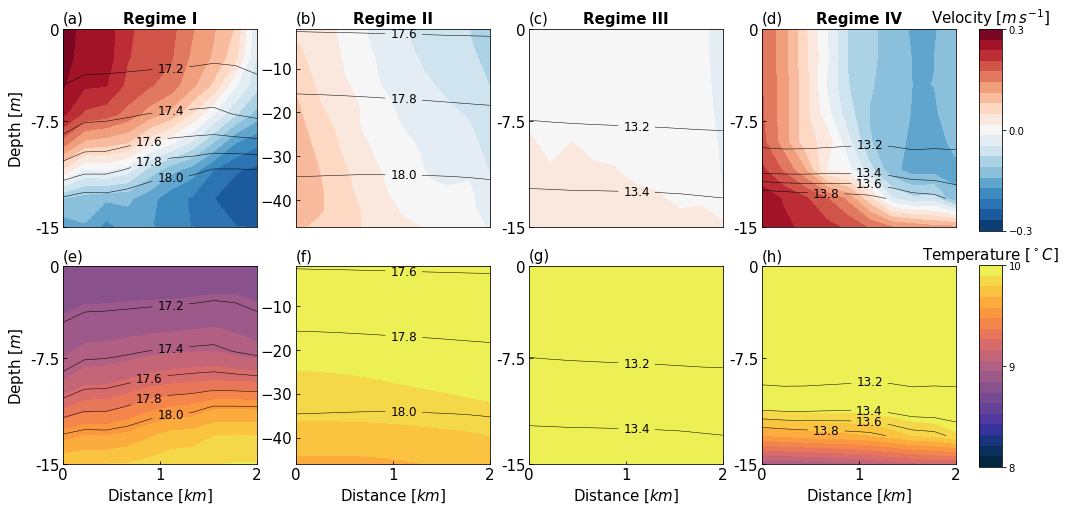

In [9]:
# Making plot for Regimes comparison at Section Sc

cu = np.linspace(-0.3,0.3,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho1 = np.linspace(13,18,26) # Contour range for density
#crho1 = [12, 13, 14, 15, 16, 17, 18] # Contour range for density
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal


fig8 = plt.figure(figsize=(16,8)) 
fig8.tight_layout()

### Along-fjord velocity
# Plot along-fjord velocity
ax1 = fig8.add_subplot(241) # Regime 1
im1 = ax1.contourf(dist, depthSc, Us1, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS1 = ax1.contour(dist, depthSc[:7], Rhos1[:7,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes1 = fig8.add_axes([0.92, 0.53, 0.02, 0.35])
cbar1 = fig8.colorbar(im1,cax=cbaxes1, orientation='vertical')
cbar1.set_ticks([-0.3,0,0.3])
cbar1.ax.set_title('Velocity [$m\,s^{-1}$]', size=15)

ax1.set_xlim(dist[0],dist[-1])
ax1.set_ylim(depthSc[7],depthSc[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_yticks([depthSc[0], -7.5, depthSc[7]])
ax1.set_yticklabels(["0","-7.5","-15"])
ax1.set_title('(a)', loc='left', size=15)
ax1.set_title('Regime I', loc='center', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig8.add_subplot(242) # Regime 2
im2 = ax2.contourf(dist, depthSc, Us2, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS2 = ax2.contour(dist, depthSc[:21], Rhos2[:21,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

ax2.set_xlim(dist[0],dist[-1])
ax2.set_ylim(depthSc[21],depthSc[0])
ax2.xaxis.set_visible(False)
#ax2.yaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b)', loc='left', size=15)
ax2.set_title('Regime II', loc='center', size=15, weight='bold')



ax3 = fig8.add_subplot(243) # Regime 3
im3 = ax3.contourf(dist, depthSc, Us3, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS3 = ax3.contour(dist, depthSc[:7], Rhos3[:7,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

ax3.set_xlim(dist[0],dist[-1])
ax3.set_ylim(depthSc[7],depthSc[0])
ax3.xaxis.set_visible(False)
#ax3.yaxis.set_visible(False)
ax3.set_yticks([depthSc[0], -7.5, depthSc[7]])
ax3.set_yticklabels(["0","-7.5","-15"])
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c)', loc='left', size=15)
ax3.set_title('Regime III', loc='center', size=15, weight='bold')



ax4 = fig8.add_subplot(244) # Regime 4
im4 = ax4.contourf(dist, depthSc, Us4, cu, cmap=cmap1)
#ax1.axhline(y=depth[8],color='k',linestyle='--')
# Isopycnals
CS4 = ax4.contour(dist, depthSc[:7], Rhos4[:7,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

ax4.set_xlim(dist[0],dist[-1])
ax4.set_ylim(depthSc[7],depthSc[0])
ax4.xaxis.set_visible(False)
#ax4.yaxis.set_visible(False)
ax4.set_yticks([depthSc[0], -7.5, depthSc[7]])
ax4.set_yticklabels(["0","-7.5","-15"])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d)', loc='left', size=15)
ax4.set_title('Regime IV', loc='center', size=15, weight='bold')



### Temperature
ax5 = fig8.add_subplot(245) # Regime 1
im5 = ax5.contourf(dist, depthSc, Ts1, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS5 = ax5.contour(dist, depthSc[:7], Rhos1[:7,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)

cbaxes2 = fig8.add_axes([0.92, 0.12, 0.02, 0.35])
cbar2 = fig8.colorbar(im5,cax=cbaxes2, orientation='vertical')
cbar2.set_ticks([8, 9, 10])
cbar2.ax.set_title('Temperature [$^\circ C$]', size=15)

ax5.set_xlim(dist[0],dist[-1])
ax5.set_ylim(depthSc[7],depthSc[0])
ax5.tick_params(direction='in', labelsize=15)
ax5.set_title('(e)', loc='left', size=15)
ax5.set_yticks([depthSc[0], -7.5, depthSc[7]])
ax5.set_yticklabels(["0","-7.5","-15"])
ax5.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax5.set_xticklabels(["0","1","2"])
ax5.set_ylabel('Depth [$m$]', size=15)
ax5.set_xlabel('Distance [$km$]', size=15)


ax6 = fig8.add_subplot(246) # Regime 2
im6 = ax6.contourf(dist, depthSc, Ts2, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS6 = ax6.contour(dist, depthSc[:21], Rhos2[:21,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)

ax6.set_xlim(dist[0],dist[-1])
ax6.set_ylim(depthSc[21],depthSc[0])
ax6.tick_params(direction='in', labelsize=15)
#ax6.yaxis.set_visible(False)
ax6.set_title('(f)', loc='left', size=15)
ax6.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax6.set_xticklabels(["0","1","2"])
ax6.set_xlabel('Distance [$km$]', size=15)

ax7 = fig8.add_subplot(247) # Regime 3
im7 = ax7.contourf(dist, depthSc, Ts3, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS7 = ax7.contour(dist, depthSc[:7], Rhos3[:7,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS7, fmt='%1.1f', fontsize=12, inline=1)

ax7.set_xlim(dist[0],dist[-1])
ax7.set_ylim(depthSc[7],depthSc[0])
ax7.tick_params(direction='in', labelsize=15)
#ax7.yaxis.set_visible(False)
ax7.set_yticks([depthSc[0], -7.5, depthSc[7]])
ax7.set_yticklabels(["0","-7.5","-15"])
ax7.set_title('(g)', loc='left', size=15)
ax7.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax7.set_xticklabels(["0","1","2"])
ax7.set_xlabel('Distance [$km$]', size=15)


ax8 = fig8.add_subplot(248) # Regime 4
im8 = ax8.contourf(dist, depthSc, Ts4, ct, cmap=cmap2)
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Isopycnals
CS8 = ax8.contour(dist, depthSc[:7], Rhos4[:7,:], crho1, colors='k', linewidths=.5)
plt.clabel(CS8, fmt='%1.1f', fontsize=12, inline=1)

ax8.set_xlim(dist[0],dist[-1])
ax8.set_ylim(depthSc[7],depthSc[0])
ax8.tick_params(direction='in', labelsize=15)
#ax8.yaxis.set_visible(False)
ax8.set_yticks([depthSc[0], -7.5, depthSc[7]])
ax8.set_yticklabels(["0","-7.5","-15"])
ax8.set_title('(h)', loc='left', size=15)
ax8.set_xticks([dist[0], (dist[0]+dist[-1])/2, dist[-1]])
ax8.set_xticklabels(["0","1","2"])
ax8.set_xlabel('Distance [$km$]', size=15)


In [29]:
np.linspace(14,24,21)

array([14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. ,
       19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5, 24. ])

In [10]:
fig7.savefig(fig_path + '/AcrossFjord_Regimes_S1.png', dpi=300, bbox_inches='tight')
fig8.savefig(fig_path + '/AcrossFjord_Regimes_Sc.png', dpi=300, bbox_inches='tight')